In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r'F:\pk\01_Data_science\ASSIGNMENTS\18_Forcasting\CocaCola_Sales_Rawdata.xlsx')

In [3]:
df.head()

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996


In [4]:
df.describe()

,Sales
count,42.000000
mean,2994.353308
std,977.930896
min,1547.818996
25%,2159.714247
50%,2782.376999
75%,3609.250000
max,5253.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


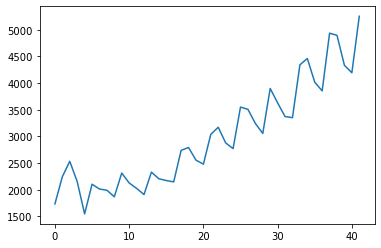

In [6]:
df.Sales.plot()

In [24]:
df['Quarter'] = df['Quarter'].astype(str)

In [28]:
df["Year"] = df['Quarter'].str.slice(3)

In [30]:
df.tail()

,Quarter,Sales,Year
37,Q2_95,4936.0,95
38,Q3_95,4895.0,95
39,Q4_95,4333.0,95
40,Q1_96,4194.0,96
41,Q2_96,5253.0,96


In [36]:
df["Q_No"] = df['Quarter'].str.slice(1,2)

In [39]:
df = pd.get_dummies(data=df, columns=['Q_No'])

In [41]:
df.shape

(42, 7)

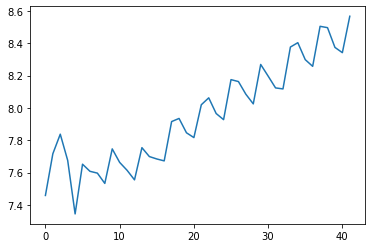

In [45]:
import numpy as np

df["t"] = np.arange(1,43)

df["t_squared"] = df["t"]*df["t"]

df["log_Sales"] = np.log(df["Sales"])

df.log_Sales.plot()

In [46]:
#splitting Data

Train = df.head(32)
Test = df.tail(11)

In [50]:
df.columns

Index(['Quarter', 'Sales', 'Year', 'Q_No_1', 'Q_No_2', 'Q_No_3', 'Q_No_4', 't',
       't_squared', 'log_Sales'],
      dtype='object')

In [47]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Sales~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_linear))**2))
rmse_linear

718.2333579167865

In [49]:
#Exponential

Exp = smf.ols('log_Sales~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

564.1844617605674

In [53]:
#Additive seasonality 

add_sea = smf.ols('Sales~Q_No_1+Q_No_2+Q_No_3+Q_No_4',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Q_No_1', 'Q_No_2', 'Q_No_3', 'Q_No_4']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea))**2))
rmse_add_sea

1781.7183068121014

In [55]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Sales~t+t_squared+Q_No_1+Q_No_2+Q_No_3+Q_No_4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Q_No_1', 'Q_No_2', 'Q_No_3', 'Q_No_4','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

278.8073160066418

In [57]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_Sales~Q_No_1+Q_No_2+Q_No_3+Q_No_4',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

1838.4145072640308

In [58]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Sales~t+Q_No_1+Q_No_2+Q_No_3+Q_No_4',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

427.9788402824818

In [60]:
#Quadratic 

Quad = smf.ols('Sales~t+t_squared',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Sales'])-np.array(pred_Quad))**2))
rmse_Quad

452.9201014825835

In [61]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
4,rmse_add_sea_quad,278.807316
6,rmse_Mult_add_sea,427.978840
2,rmse_Quad,452.920101
1,rmse_Exp,564.184462
0,rmse_linear,718.233358
3,rmse_add_sea,1781.718307
5,rmse_Mult_sea,1838.414507


In [72]:
#Additive Seasonality Quadratic has lowes rsme score

#Additive Seasonality Quadratic 

#testing model on entire data

#add_sea_Quad = smf.ols('Sales~t+t_squared+Q_No_1+Q_No_2+Q_No_3+Q_No_4',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(df[['Q_No_1', 'Q_No_2', 'Q_No_3', 'Q_No_4','t','t_squared']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(df['Sales'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

185.82859889149012

In [66]:
df['Predicted_values']  = pd.Series(pred_add_sea_quad)

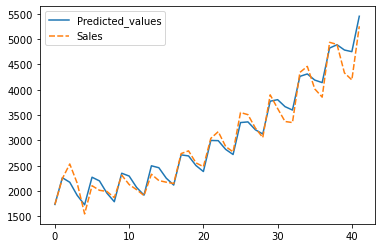

In [71]:
sns.lineplot(data=df[['Predicted_values','Sales']])